## Computational Homework 1

In this assignment, we work through an example of simple (univariate) linear regression, with examples of: visualizing and transforming features, fitting a simple linear regression model, interpreting the model, and evaluating the model using residual plots and the $R^2$.

As usual, you will likely find the notebooks on the [online book](https://rythei.github.io/linear-models/overview.html) useful, especially if you don't have much prior experience using python.

For this assignment, you will need to download the dataset `urbanization-vs-gdp-2015.csv` from [this link](https://drive.google.com/drive/folders/1OkXMcFo0urN0kSQYH4d75I4V3pnSpV6H?usp=sharing). Once you've downloaded the `.csv` file, store it in the same directory as this notebook. Then you will be able to load the dataset into python using the following code. 

In [1]:
import pandas as pd

dataset = pd.read_csv("urbanization-vs-gdp-2015.csv")

This dataset contains two features measured for 165 different countries in the world (sourced from the UN):

1. GDP per-capita for each country in 2015 (column name `gdp_per_capita`)
2. Percent of the population living in urban areas (column name `percent_urban_pop`)

We will analyze the relationship between these two variables throughout this assignment.

### Part 1: visualizing and transforming features

To begin our analysis, we will inspect and visualize the GDP and urban population data. 

**Plotting histograms and transforming features** 

- Plot histograms of both the `gdp_per_capita` and `percent_urban_pop` variables. Do the distributions look approximately symmetric, or is one of both of them skewed?
- For any of the features that appear skewed, determine an appropriate transformation to apply to the feature(s), and plot a histogram after applying the transformation. _Note: you should find that transforming at least one feature is necessary for removing skew (but not necessarily both)._

In [7]:
import matplotlib.pyplot as plt
import numpy as np

gdp_per_capita = dataset["gdp_per_capita"].to_numpy()
percent_urban_pop = dataset["percent_urban_pop"].to_numpy()

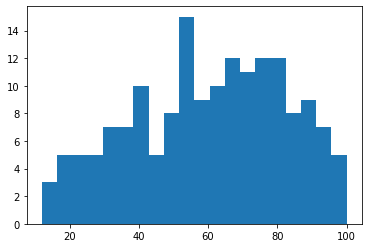

In [8]:
## this histogram appears to be roughly symmetric, so we don't need to perform a transformation

plt.hist(percent_urban_pop, bins=20)
plt.show()

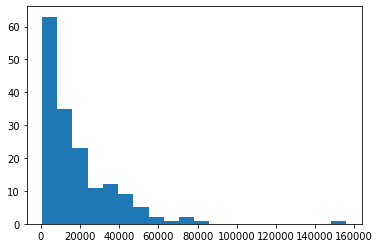

In [9]:
## this histogram is skewed considerably, so we will probably want to perform some transformation
plt.hist(gdp_per_capita, bins=20)
plt.show()

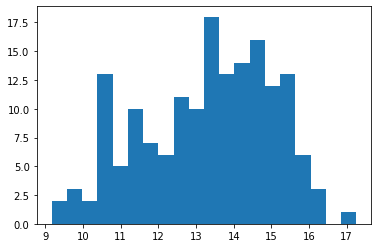

In [21]:
## performing the log2 transformation seems to help (we use log2 here, but you could use others)
plt.hist(np.log2(gdp_per_capita), bins=20)
plt.show()

**Inspecting the joint relationship via scatterplots**

- Plot a scatterplot of `gdp_per_capita` (on the y-axis) versus `percent_urban_pop` (on the x-axis) using the _untransformed_ only. What relationship do you observe between the two features? Does this relationship appear to be approximately linear?
- Create the same scatterplot, but this time using the transformed features from the previous part instead of the untransformed ones. Does the relationship appear more linear now? Explain why this happens.

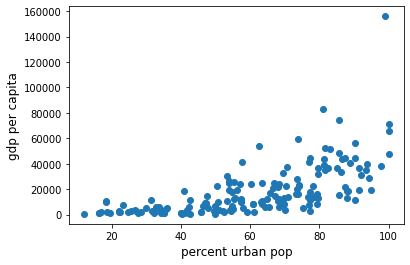

In [11]:
## the relationship here is not linear because of the skew in gdp_per_capita
plt.scatter(percent_urban_pop, gdp_per_capita)
plt.xlabel("percent urban pop", fontsize=12)
plt.ylabel("gdp per capita", fontsize=12)
plt.show()

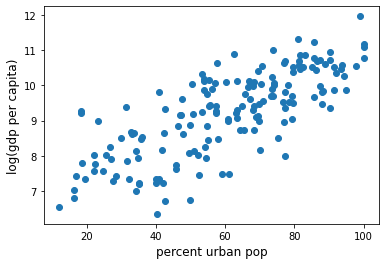

In [12]:
## taking log2(gdp_per_capita) instead makes the relationship look more linear
plt.scatter(percent_urban_pop, np.log2(gdp_per_capita))
plt.xlabel("percent urban pop", fontsize=12)
plt.ylabel("log(gdp per capita)", fontsize=12)
plt.show()

### Part 2: fitting linear regression models

Now that we've done some basic analysis on our data, we can try to fit a linear regression model to try to quantify the relationship between `percent_urban_pop` and `gdp_per_capita`.

**Writing code for least squares**

Recall that given the linear model 

$$
y_i = \alpha + \beta x_i + \varepsilon_i,
$$

we can estimate the coefficients $\hat{\alpha},\hat{\beta}$ by minimizing the sum of squared errors 

$$
\sum_{i=1}^n (y_i - (\alpha + \beta x_i))^2
$$

which gives the solutions

$$
\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}\\
\hat{\beta} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
$$

Write a python function `fit_linear_regression(x,y)` which takes in arrays `x` and `y` and returns the least squares coefficients $\hat{\alpha}$ and $\hat{\beta}$. (Note, you should be able to use code from the online book for this.)

In [13]:
def fit_linear_regression(x, y):
    """
    Inputs:
        x (numpy array)
        y (numpy array)
        
    Returns:
        alpha_hat, beta_hat
    """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    beta_hat = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2)
    alpha_hat = y_bar - beta_hat*x_bar
    return alpha_hat, beta_hat

**Fitting models**

- Fit the linear regression model 
$$
\text{gdp_per_capita}_i = \alpha + \beta \cdot \text{percent_urban_pop}_i + \varepsilon_i
$$
using your above code, and report the coefficients. Then, make a scatterplot of `percent_urban_pop` versus `gdp_per_capita` and overlay the line you fitted. How does the fit look?
- Fit the linear regression model 
$$
\log(\text{gdp_per_capita}_i) = \alpha + \beta \cdot \text{percent_urban_pop}_i + \varepsilon_i,
$$ 
and make a scatterplot of log `gdp_per_capita` versus `percent_urban_pop`, and again overlay the line you fitted. Interpret the coefficients -- how can you interpret the value of $\hat{\beta}$? What does this tell you about the relationship between `percent_urban_pop` and `gdp_per_capita`?

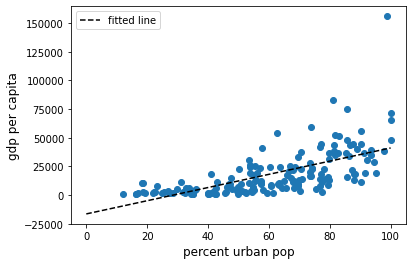

In [17]:
## the fit here doesn't look so good, because as we noted before the relationship doesn't look linear with the 
## untransformed features
alpha_hat_1, beta_hat_1 = fit_linear_regression(percent_urban_pop, gdp_per_capita)

xx = np.linspace(0, 100, 5)
yy = alpha_hat_1 + beta_hat_1*xx

plt.scatter(percent_urban_pop, gdp_per_capita)
plt.plot(xx, yy, label='fitted line', linestyle='--', color='black')
plt.xlabel("percent urban pop", fontsize=12)
plt.ylabel("gdp per capita", fontsize=12)
plt.legend()
plt.show()

9.722600069308559 0.05939728522489506


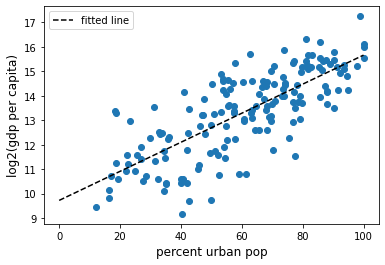

In [23]:
## the fit here looks much better. we can interpret the coefficient beta_hat=0.04 as follows: if percent_urban_pop
## goes up by 1%, then gdp_per_capita goes up by a factor of 2^(0.04) = 1.02, 
## i.e. gdp per capita goes up by about 2%

alpha_hat_2, beta_hat_2 = fit_linear_regression(percent_urban_pop, np.log2(gdp_per_capita))
print(alpha_hat_2, beta_hat_2)

xx = np.linspace(0, 100, 5)
yy = alpha_hat_2 + beta_hat_2*xx

plt.scatter(percent_urban_pop, np.log2(gdp_per_capita))
plt.plot(xx, yy, label='fitted line', linestyle='--', color='black')
plt.xlabel("percent urban pop", fontsize=12)
plt.ylabel("log2(gdp per capita)", fontsize=12)
plt.legend()
plt.show()

### Part 3: evaluating linear regression models with residual plots and the $R^2$



**Evaluating residuals**

- For both of the models fit in the previous part, use the coefficients $\hat{\alpha}, \hat{\beta}$ to compute the fitted values $\hat{y}_i = \hat{\alpha} + \hat{\beta}\cdot \text{percent_urban_pop}_i$. 
- Compute an array `r` containing the residuals $r_i = y_i - \hat{y}_i$ (where $y_i$ will be either $\text{gdp_per_capita}_i$ or $\log(\text{gdp_per_capita}_i)$). Plot a histogram of these values and verify that $\sum_{i=1}^n r_i = 0$. Describe in words what the distribution of residuals look like for the log model versus the basic model (e.g. is it skewed, does it look approximately normally distributed?)


In [24]:
y_hat_1 = alpha_hat_1 + beta_hat_1*percent_urban_pop
y_hat_2 = alpha_hat_2 + beta_hat_2*percent_urban_pop

r_1 = gdp_per_capita - y_hat_1
r_2 = np.log2(gdp_per_capita) - y_hat_2

# the sum of both is numerically equivalent to zero
print(np.sum(r_1), np.sum(r_2))

4.656612873077393e-10 4.583000645652646e-13


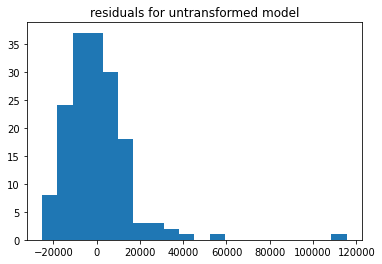

In [27]:
# this distribution looks skewed
plt.hist(r_1, bins=20)
plt.title("residuals for untransformed model")
plt.show()

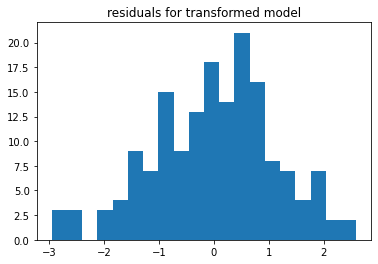

In [28]:
# this one does not look sweked
plt.hist(r_2, bins=20)
plt.title("residuals for transformed model")
plt.show()

**Computing the $R^2$**

- For both of the models fit in part 2, compute 1) the $\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$, 2) the $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ and 3) the $\text{RegSS}  = \text{TSS}- \text{RSS}$. Which model has a smaller $\text{RSS}$? Interpret what this means about the model.
- For both models, using the values you've just computed, find the $R^2 = \text{RegSS}/\text{TSS}$. Interpret what these values mean. Which model has a higher $R^2$? Based on this, which model would you choose to better represent the relationship between GDP and percent urban population?

In [29]:
rss_1 = np.sum(r_1**2)
tss_1 = np.sum((gdp_per_capita - np.mean(gdp_per_capita))**2)
regss_1 = tss_1 - rss_1
R2_1 = regss_1/tss_1
print(f"R2 for untransformed_model: {R2_1}")

R2 for untransformed_model: 0.4056277966504825


In [31]:
# this model has a higher R2, so we would probably choose this one to describe the relationship between 
# gdp per capita and percent urban population
rss_2 = np.sum(r_2**2)
tss_2 = np.sum((np.log2(gdp_per_capita) - np.mean(np.log2(gdp_per_capita)))**2)
regss_2 = tss_2 - rss_2
R2_2 = regss_2/tss_2
print(f"R2 for untransformed_model: {R2_2}")

R2 for untransformed_model: 0.5781448010111713
